<a href="https://colab.research.google.com/github/tawanyb/tawanyb/blob/main/desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [ ]:
#  missing pra plotar entnder melhor dados nulos.

In [ ]:
import missingno as msno

<Axes: >

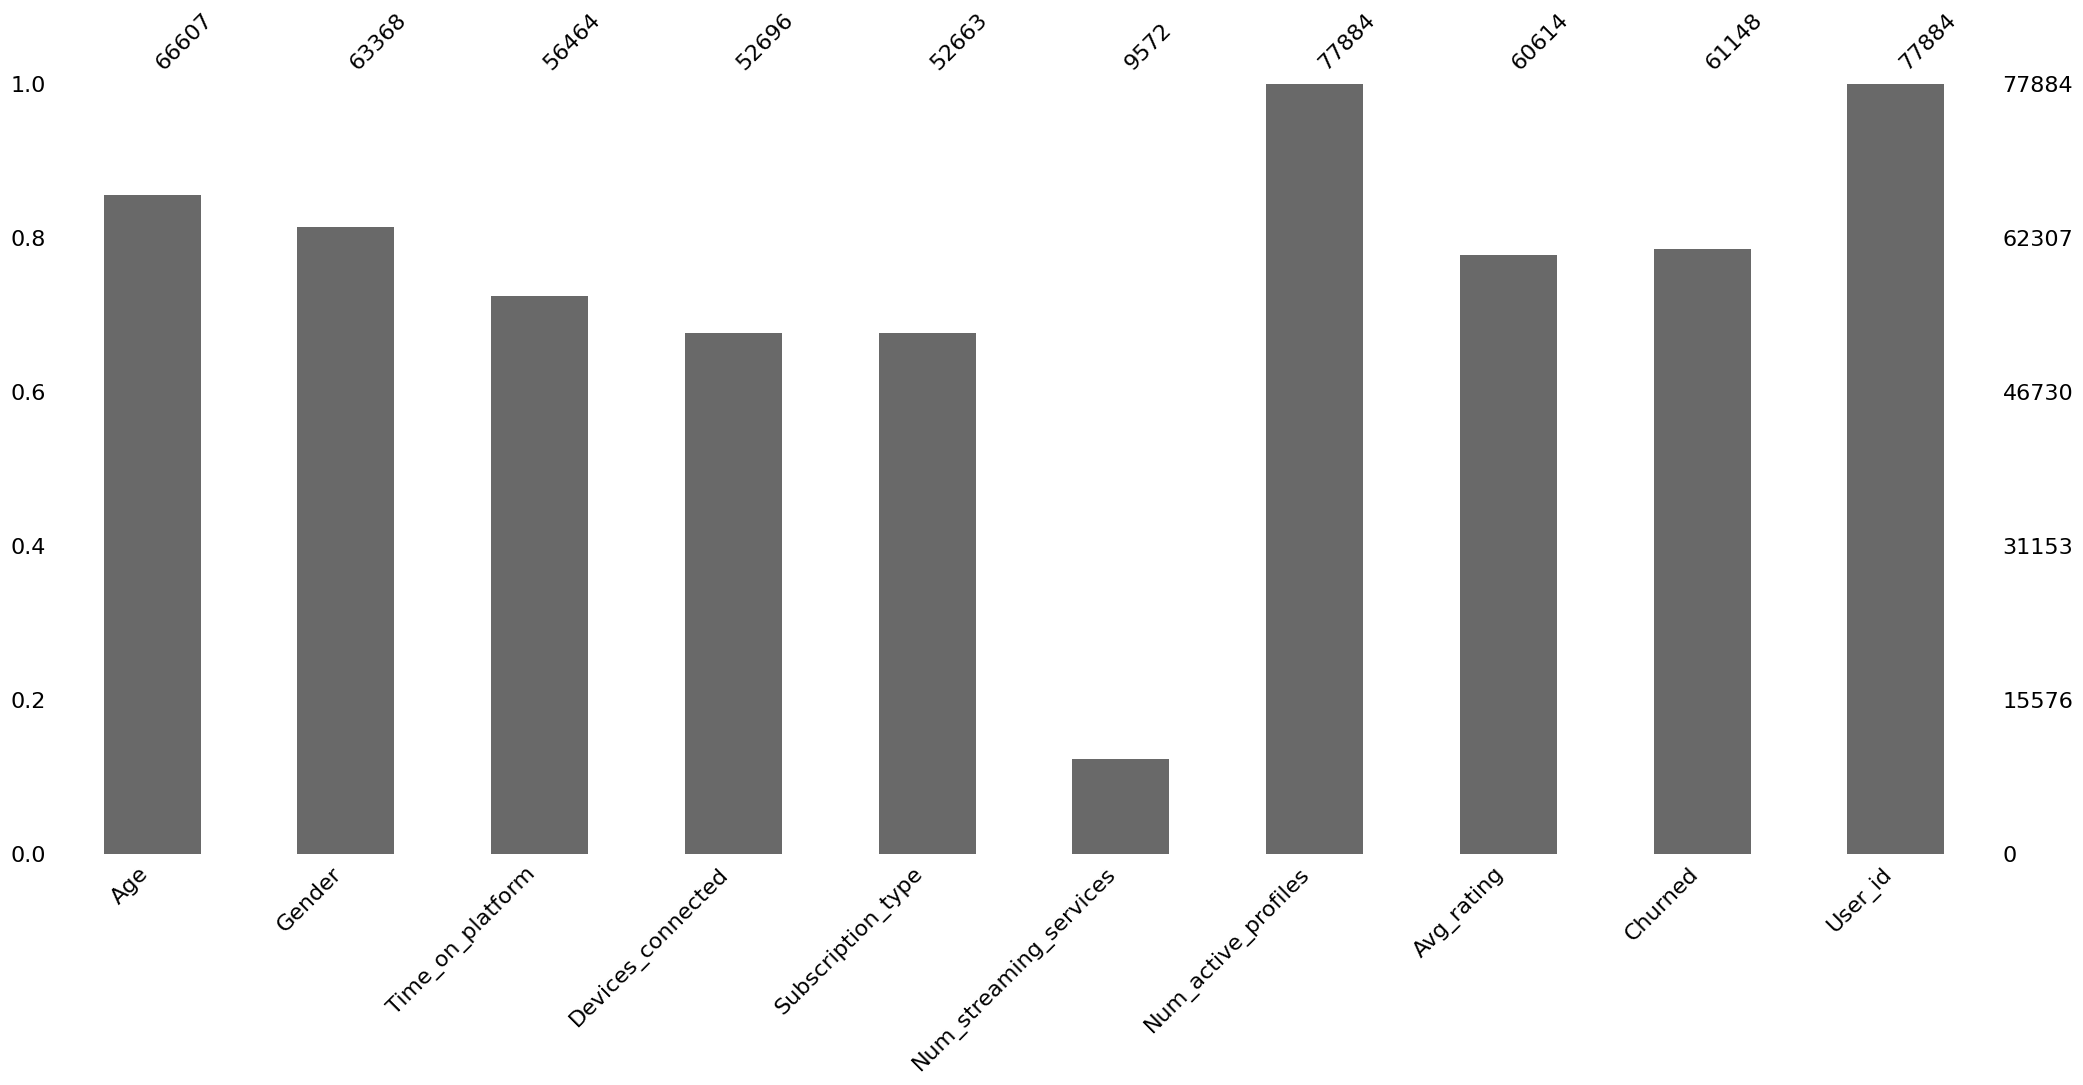

In [ ]:
msno.bar(df)

In [ ]:
#indentificando e tratando os nulos

In [ ]:
df= df.fillna({'Time_on_platform':0,'Num_streaming_services':0,'Churned':0,'Avg_rating':0,'Devices_connected':0})

In [ ]:
df= df.dropna(subset=['Gender','Subscription_type', 'Age'])

In [ ]:
df.replace(value='Churn', to_replace='yes or no')

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,0.0,0.0,Basic,0.0,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,0.0,Premium,0.0,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,0.0,5.0,Premium,0.0,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,0.0,4,0.00,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


In [ ]:
#float pra int

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Time_on_platform'] = df['Time_on_platform'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)
df['Avg_rating'] = df['Avg_rating'].astype(int)
df['Churned'] = df['Churned'].astype(int)

In [ ]:
#regressao logistic
x = df.drop(columns=['Churned', 'User_id'], axis=1)
y = df['Churned']
x = df.iloc[:, :-2]
y = df.iloc[:, -2]

In [ ]:
#dummies
x=pd.get_dummies(x)

from sklearn.preprocessing import MinMaxScaler
mn= MinMaxScaler()
x= pd.DataFrame(mn.fit_transform(x))

In [ ]:
#labelencoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

le.fit(df.Gender)
df.Gender = le.transform(df.Gender)

le.fit (df.Subscription_type)
df.Subscription_type= le.transform(df.Subscription_type)


In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [ ]:
model = LogisticRegression()
lr= model.fit(x_train,y_train)


In [ ]:
lr = model.predict(x_test)

In [ ]:
y_pred = model.predict(x_test)

x_test.assign(churn= y_test).assign(label= y_pred)

,0,1,2,3,4,5,6,7,8,9,10,churn,label
34121,0.019608,0.129809,0.4,0.0,1.00,0.2,0.0,1.0,0.0,0.0,1.0,NaN,0
10644,0.411765,0.077292,0.0,0.0,0.25,0.6,1.0,0.0,0.0,0.0,1.0,NaN,0
16809,0.549020,0.009818,0.8,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0
13894,0.921569,0.872017,0.6,0.0,0.00,0.2,1.0,0.0,1.0,0.0,0.0,NaN,0
23144,0.117647,0.000000,0.6,0.0,0.75,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22659,0.509804,0.318530,0.0,0.0,0.25,0.0,0.0,1.0,0.0,1.0,0.0,NaN,0
26459,0.294118,0.800891,0.6,0.0,0.75,0.4,1.0,0.0,0.0,1.0,0.0,NaN,0
31656,0.078431,0.743121,0.2,0.0,0.00,0.8,0.0,1.0,1.0,0.0,0.0,NaN,0
606,0.647059,0.823838,0.0,0.0,1.00,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0


Text(0.5, 0, 'Predicted')

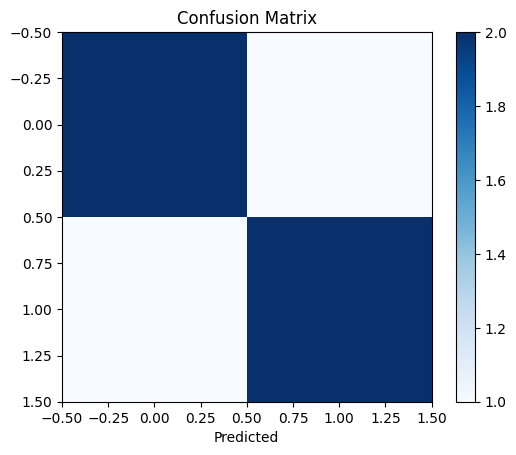

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 1, 0, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')

In [ ]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print(f'Acurácia (treino) : {accuracy_score(y_train, model.predict(x_train))}')
print(f'Acurácia (teste) : {accuracy_score(y_test, model.predict(x_test))}')

Acurácia (treino) : 0.8063809393399972
Acurácia (teste) : 0.8082979597425716


In [ ]:
print(f'Acurácia balanced (treino) : {balanced_accuracy_score(y_train, model.predict(x_train))}')
print(f'Acurácia balanced (teste) : {balanced_accuracy_score(y_test, model.predict(x_test))}')

Acurácia balanced (treino) : 0.5
Acurácia balanced (teste) : 0.5


In [ ]:
x= df[['Age', 'Gender', 'Time_on_platform', 'Devices_connected', 'Subscription_type', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']]
y= df[['Churned']]
y= pd.DataFrame(y)

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

parameters= {'max_depth': [1,2,3,4,5,6,7,8,9,10],
             'n_estimators': [100,300,500],
             }

grid_search= GridSearchCV(rf,parameters,scoring='accuracy',cv=5, n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}